预测结果可视化

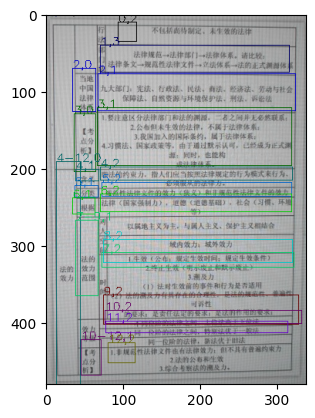

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from glob import glob
import json
import numpy as np
import shutil
from pathlib import Path
from tqdm import tqdm

# jpg_json_path = "/media/ubuntu/Date12/TableStruct/data/test_A_jpg.json"
# jpg_info = json.load(open(jpg_json_path, 'r'))

def table_img_visualize(src_img_path, pred_json_path):
    # 彩色检测框
    col2color = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                col2color.append((i*100, j*100, k*100))
    col2color = np.array(col2color)

    src_img = cv2.imread(src_img_path)
    json_data = json.load(open(pred_json_path, 'r'))
    img_id = os.path.basename(src_img_path).split(".")[0]
    # 遍历坐标列表
    for i, cell in enumerate(json_data["cells"]):
        x1, y1, x2, y2 = np.array(cell['bbox']).astype(np.int32).tolist()
        row_start, row_end = cell["row_start_idx"], cell["row_end_idx"]
        col_start, col_end = cell["col_start_idx"], cell["col_end_idx"]
        row_text = f"{row_start}" if row_start == row_end else f"{row_start}-{row_end}"
        col_text = f"{col_start}" if col_start == col_end else f"{col_start}-{col_end}"
        text = f"{row_text},{col_text}"

        color = col2color[row_start % col2color.shape[0]]
        cv2.rectangle(src_img, (x1, y1, x2-x1, y2-y1), color.tolist(), 1)

        width, height = src_img.shape[1], src_img.shape[0]
        font_scale = min(width, height)//1024
        font_scale = max(font_scale, 0.5)
        font_thickness = int(font_scale * 2)
        cv2.putText(src_img, text, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color.tolist(), font_thickness)

        plt.imshow(src_img)
    plt.show()

# 参数：数据集名称
DATASET = "test_A_jpg480max"
IMG_ID = "05181"
# 输入数据目录
img_data_dir    = f"/media/ubuntu/Date12/TableStruct/new_data/{DATASET}"
pred_json_dir   = f"./output/structure_result/{DATASET}-pred.json/"

src_img_path = os.path.join(img_data_dir, f"{IMG_ID}.jpg")
pred_json_path = os.path.join(pred_json_dir, f"{IMG_ID}-pred.json")
table_img_visualize(src_img_path, pred_json_path)
